# **Importing libraries**

In [ ]:
!pip install ipython-autotime
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, average_precision_score
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.23 s (started: 2021-01-09 20:16:02 +00:00)


# **Import Data**

In [ ]:
data = pd.read_csv('creditcard.csv')
data = data.drop(['Time'] , axis=1)

time: 1.16 s (started: 2021-01-09 20:16:04 +00:00)


In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


time: 53.5 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
Fraud = data[data['Class']==1]
Nofraud = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Nofraud))

time: 21.8 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
outlier_fraction

0.0019275057574847303

time: 2.95 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
data.isna().values.any()

True

time: 11.3 ms (started: 2021-01-09 20:16:05 +00:00)


# **Data Pre-processing**

In [ ]:
X = data.drop('Class',axis=1) 
y = data['Class']
y = pd.DataFrame(y)
y.head(5)

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


time: 28.7 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
#outlier dataframe to test model on Unsupervised
X_outliers = Fraud.drop(['Class'], axis=1)
len(X_outliers)

385

time: 3.51 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
#Split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

time: 73.8 ms (started: 2021-01-09 20:16:05 +00:00)


In [ ]:
#replace inifinty values in dataframe
X_test= np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

time: 19 ms (started: 2021-01-09 20:16:06 +00:00)


# **Isolation forest**

In [ ]:
clf = IsolationForest(max_samples=100)

clf

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

time: 4.55 ms (started: 2021-01-09 20:16:06 +00:00)


**Fit model on data**

In [ ]:
Iso_outliers = clf.fit(X_train)

time: 1.56 s (started: 2021-01-09 20:16:06 +00:00)


**predictions**

In [ ]:
#Predict on train data
Iso_outliers_train = Iso_outliers.predict(X_train)
Iso_outliers_train

array([1, 1, 1, ..., 1, 1, 1])

time: 4.59 s (started: 2021-01-09 20:16:07 +00:00)


In [ ]:
#Predict on test data
Iso_outliers_test = Iso_outliers.predict(X_test)
Iso_outliers_test

array([1, 1, 1, ..., 1, 1, 1])

time: 1.92 s (started: 2021-01-09 20:16:12 +00:00)


In [ ]:
#Calcuate the decision function on the test data
y_score = - Iso_outliers.decision_function(X_test)

time: 1.91 s (started: 2021-01-09 20:16:14 +00:00)


In [ ]:
#Predict on outlier data
Iso_outliers_pred = Iso_outliers.predict(X_outliers)

time: 61.8 ms (started: 2021-01-09 20:16:16 +00:00)


# **Isolation Forest Model Evaulation**

In [ ]:
#isolation Forest
print("Accuracy test :", list(Iso_outliers_test).count(1)/Iso_outliers_test.shape[0])
print("Accuracy outliners:", list(Iso_outliers_pred).count(-1)/Iso_outliers_pred.shape[0])

Accuracy test : 0.9391552017055864
Accuracy outliners: 0.8675324675324675
time: 26.4 ms (started: 2021-01-09 20:16:16 +00:00)


In [ ]:
print("ROC AUC: %0.1f%%" % (roc_auc_score(y_test, y_score) * 100.))

ROC AUC: 94.6%
time: 28.7 ms (started: 2021-01-09 20:16:16 +00:00)


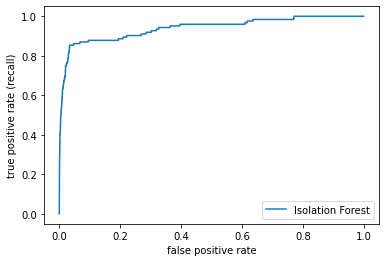

time: 189 ms (started: 2021-01-09 20:16:16 +00:00)


In [ ]:
fp1, tp1, thres1 = roc_curve(y_test, y_score)
plt.plot(fp, tp, label="Isolation Forest")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.legend()

# **Local Outlier Factor**

In [ ]:
clf2= LocalOutlierFactor(n_neighbors=20, novelty=True)
clf2

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

time: 4.57 ms (started: 2021-01-09 20:16:16 +00:00)


**Fit Model on data**

In [ ]:
lof_outliers = clf2.fit(X_train)

time: 1min 51s (started: 2021-01-09 20:16:16 +00:00)


In [ ]:
#Predict on train data
lof_outliers_train = lof_outliers.predict(X_train)
lof_outliers_train

array([1, 1, 1, ..., 1, 1, 1])

time: 1min 47s (started: 2021-01-09 20:18:08 +00:00)


In [ ]:
#Predict on test data
lof_outliers_test = lof_outliers.predict(X_test)
lof_outliers_test

array([1, 1, 1, ..., 1, 1, 1])

time: 46.2 s (started: 2021-01-09 20:19:55 +00:00)


In [ ]:
#Calcuate the decision function on the test data
lof_y_score = - lof_outliers.decision_function(X_test)

time: 46.5 s (started: 2021-01-09 20:20:42 +00:00)


In [ ]:
#Predict on outlier data
lof_outliers_pred = lof_outliers.predict(X_outliers)

time: 314 ms (started: 2021-01-09 20:21:28 +00:00)


# **Local Outlier Factor Model Evaulation**

In [ ]:
print("ROC AUC: %0.1f%%" % (roc_auc_score(y_test, lof_y_score) * 100.))

ROC AUC: 68.4%
time: 24.5 ms (started: 2021-01-09 20:21:28 +00:00)


In [ ]:
#LOF
print("Accuracy test :", list(lof_outliers_test).count(1)/lof_outliers_test.shape[0])
print("Accuracy outliners:", list(lof_outliers_pred).count(-1)/lof_outliers_pred.shape[0])

Accuracy test : 0.9580932076351644
Accuracy outliners: 0.36623376623376624
time: 17.4 ms (started: 2021-01-09 20:21:28 +00:00)


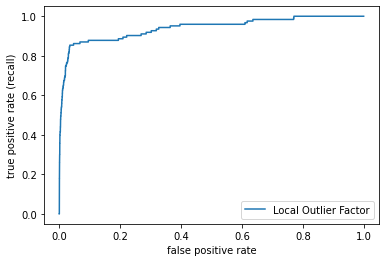

time: 197 ms (started: 2021-01-09 20:21:28 +00:00)


In [ ]:
fp2, tp2, thres2 = roc_curve(y_test, lof_y_score)
plt.plot(fp, tp, label="Local Outlier Factor")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.legend()

# **One Class SVM**

In [ ]:

clf3 = OneClassSVM(nu=.2,kernel='linear',gamma=.001)
clf3

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='linear',
            max_iter=-1, nu=0.2, shrinking=True, tol=0.001, verbose=False)

time: 4.58 ms (started: 2021-01-09 20:21:29 +00:00)


In [ ]:
#Fit Model on train data
OneClassSVM = clf3.fit(X_train)

time: 6min 57s (started: 2021-01-09 20:21:29 +00:00)


In [ ]:
#Predict on train data
OneClassSVM_train = OneClassSVM.predict(X_train)
OneClassSVM_train

array([1, 1, 1, ..., 1, 1, 1])

time: 1min 55s (started: 2021-01-09 20:28:26 +00:00)


In [ ]:
#Predict on test data
OneClassSVM_test = OneClassSVM.predict(X_test)
OneClassSVM_test

array([-1,  1,  1, ...,  1,  1,  1])

time: 49.1 s (started: 2021-01-09 20:30:21 +00:00)


In [ ]:
#Calcuate the decision function on the test data
OneClassSVM_y_score = - OneClassSVM.decision_function(X_test)

time: 49.1 s (started: 2021-01-09 20:31:10 +00:00)


In [ ]:
#Predict on outlier data
OneClassSVM_pred = OneClassSVM.predict(X_outliers)

time: 332 ms (started: 2021-01-09 20:31:59 +00:00)


# **One Class SVM Evaluation**

In [ ]:
print("ROC AUC: %0.1f%%" % (roc_auc_score(y_test, OneClassSVM_y_score) * 100.))

ROC AUC: 49.9%
time: 24.9 ms (started: 2021-01-09 20:32:00 +00:00)


In [ ]:
print("Accuracy test :", list(OneClassSVM_test).count(1)/OneClassSVM_test.shape[0])
print("Accuracy outliners:", list(OneClassSVM_pred).count(-1)/OneClassSVM_pred.shape[0])

Accuracy test : 0.8005429894400213
Accuracy outliners: 0.3116883116883117
time: 21.2 ms (started: 2021-01-09 20:32:00 +00:00)


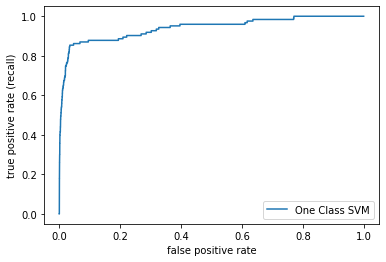

time: 188 ms (started: 2021-01-09 20:32:00 +00:00)


In [ ]:
fp3, tp3, thres3 = roc_curve(y_test, OneClassSVM_y_score)
plt.plot(fp, tp, label="One Class SVM")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate (recall)")
plt.legend()

# **Plot 3 ROC Curves together**

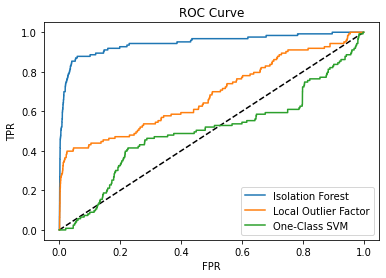

time: 179 ms (started: 2021-01-09 20:32:00 +00:00)


In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fp1, tp1, label= "Isolation Forest")
plt.plot(fp2, tp2, label= "Local Outlier Factor")
plt.plot(fp3, tp3, label= "One-Class SVM")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()